Data Overview:
Number of records: 17

Descriptive Statistics for Air Quality and Sleep Quality:
              O3       PM2.5       PM10        NO2         CO        SO2  \
count  17.000000   17.000000  17.000000  17.000000  17.000000  17.000000   
mean   25.176471   42.117647  22.411765  20.647059   1.764706  10.294118   
std    10.013961   22.104531   8.902660  10.758376   1.300452   6.449464   
min    12.000000   21.000000   9.000000   1.000000   1.000000   1.000000   
25%    18.000000   27.000000  15.000000  11.000000   1.000000   5.000000   
50%    22.000000   35.000000  21.000000  22.000000   1.000000  10.000000   
75%    31.000000   53.000000  29.000000  27.000000   2.000000  13.000000   
max    47.000000  109.000000  44.000000  41.000000   6.000000  22.000000   

       Light Sleep (min)  REM Sleep (min)  Deep Sleep (min)  
count          17.000000        17.000000         17.000000  
mean          334.941176       144.470588         16.705882  
std            86.682950        4

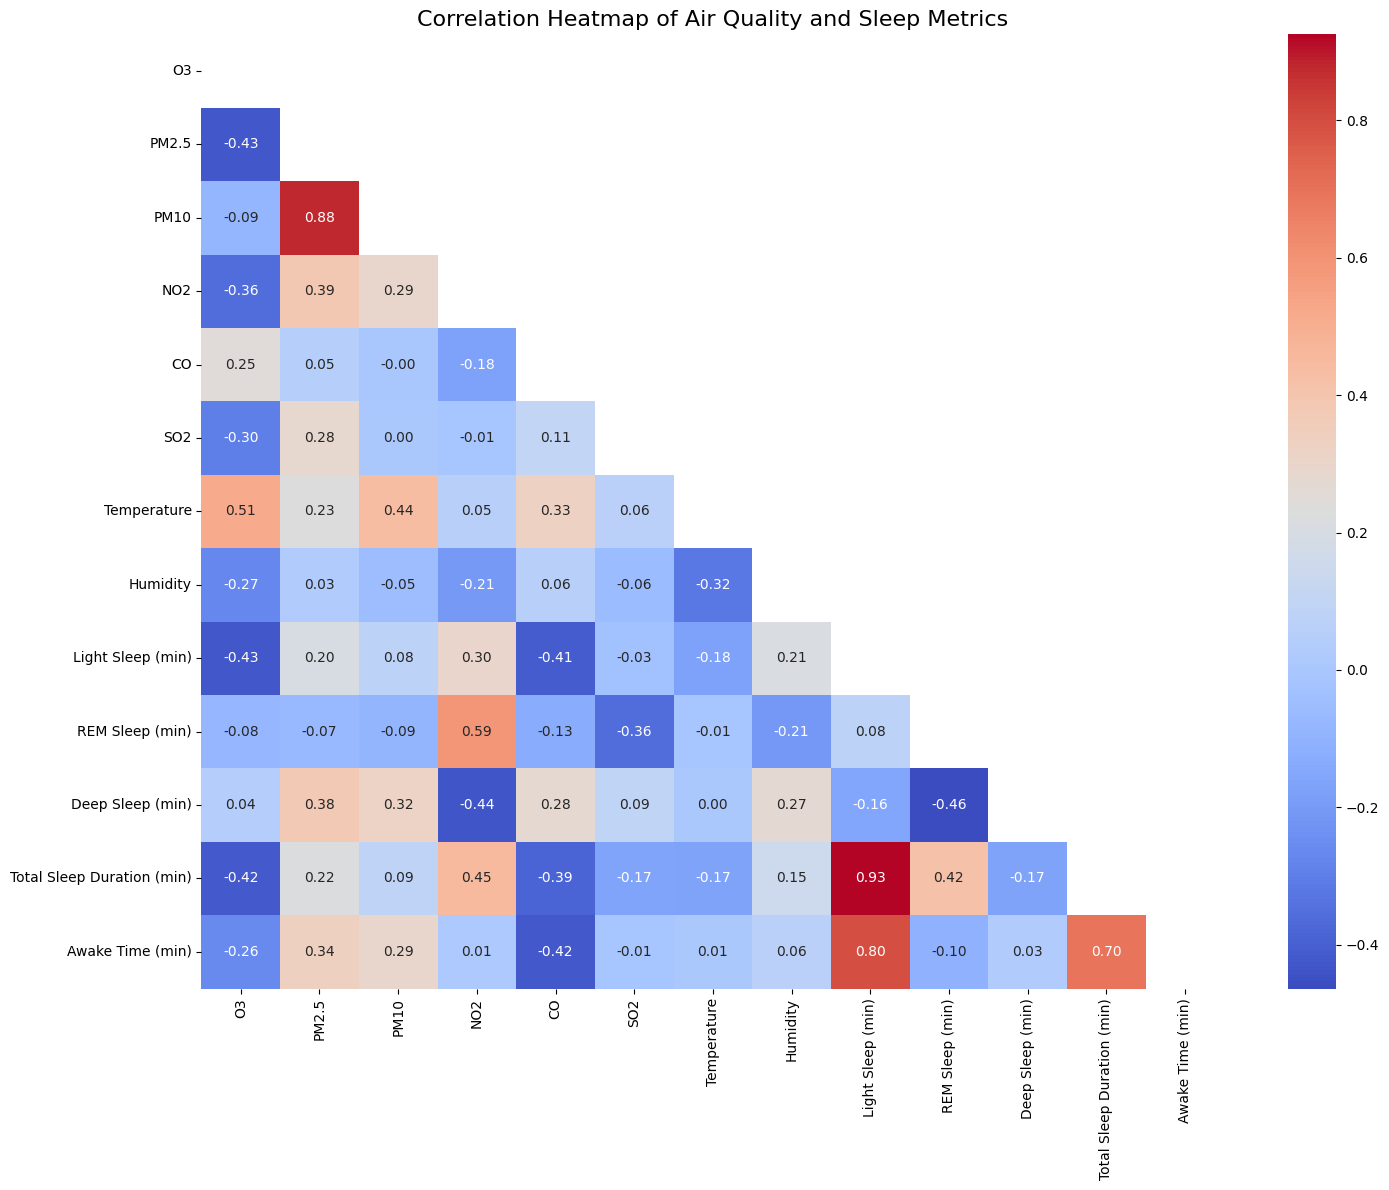


Correlations between Environmental Factors and Sleep Quality:
             Light Sleep (min)  REM Sleep (min)  Deep Sleep (min)
O3                   -0.427387        -0.079345          0.042087
PM2.5                 0.199238        -0.069861          0.379465
PM10                  0.075839        -0.094465          0.321272
NO2                   0.296470         0.591493         -0.435110
CO                   -0.413740        -0.130363          0.277982
SO2                  -0.031941        -0.357095          0.094634
Temperature          -0.175784        -0.013199          0.003493
Humidity              0.209908        -0.210568          0.269301

Strongest correlations for each sleep quality metric:

Light Sleep (min):
NO2            0.296470
Humidity       0.209908
PM2.5          0.199238
PM10           0.075839
SO2           -0.031941
Temperature   -0.175784
CO            -0.413740
O3            -0.427387
Name: Light Sleep (min), dtype: float64

REM Sleep (min):
NO2            0.5

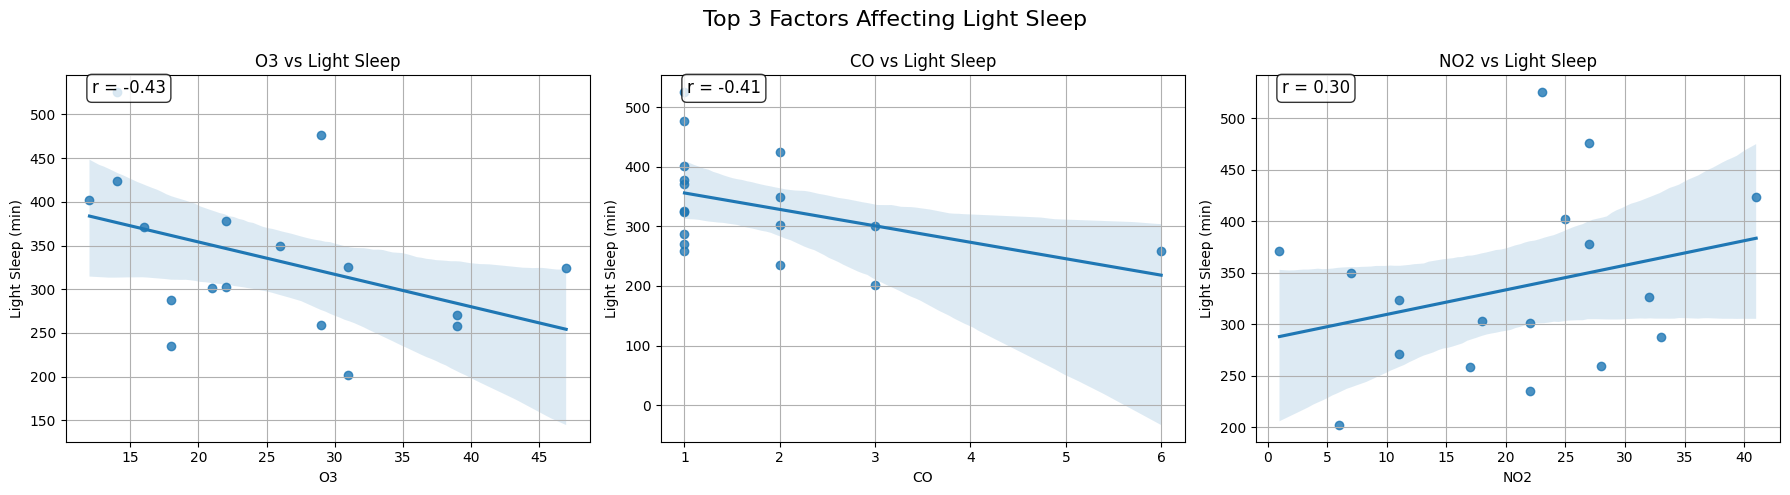

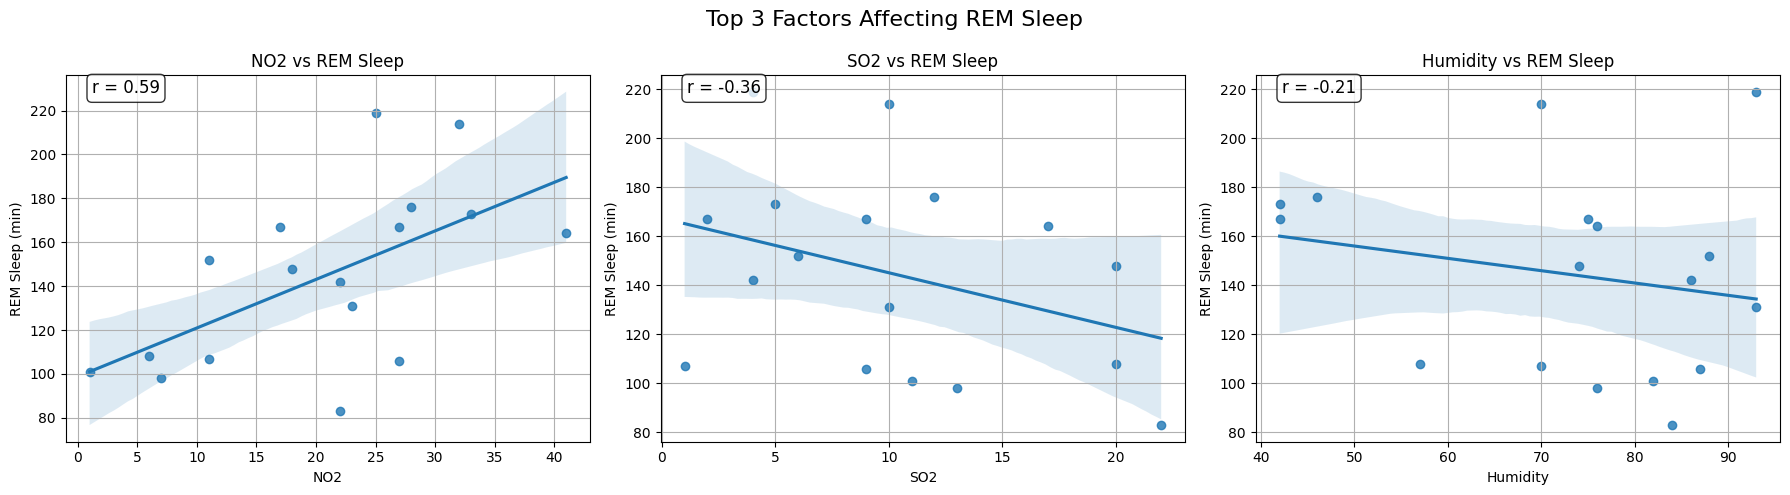

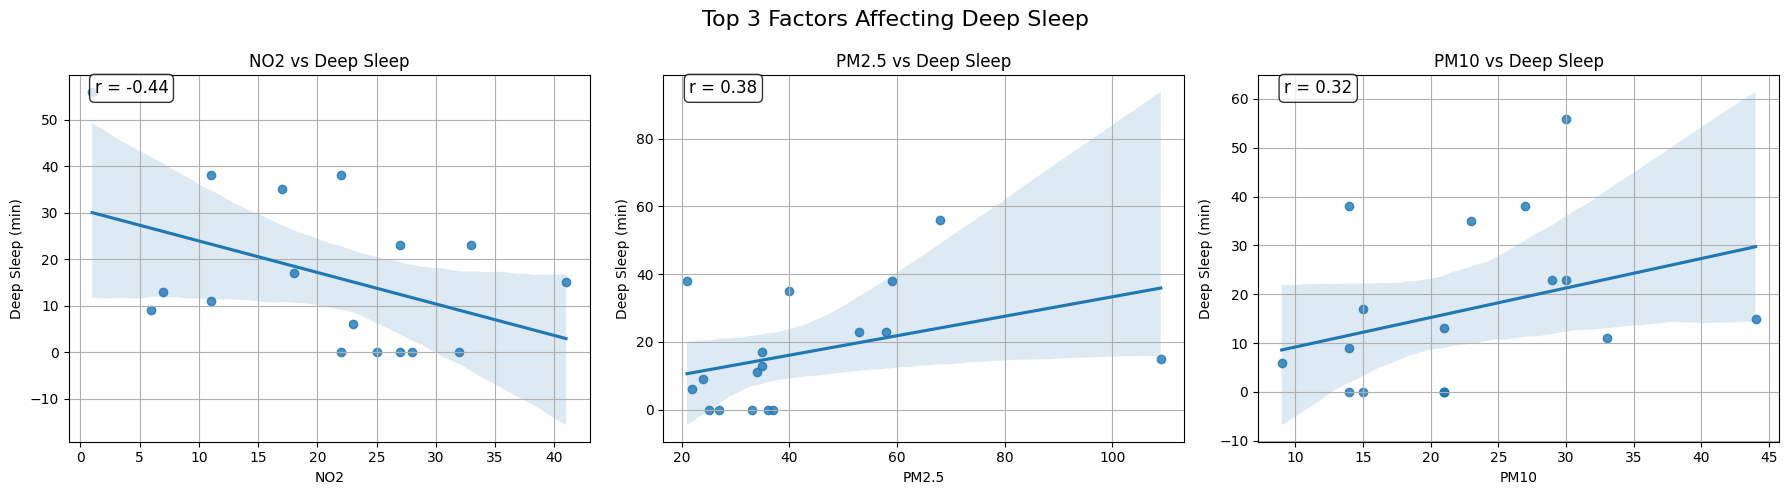


--- Multiple Regression Analysis ---

Regression Model for Light Sleep:
R-squared: 0.410
Adjusted R-squared: -0.180
F-statistic: 0.69, p-value: 0.6908
No statistically significant predictors found at p < 0.1

Regression Model for REM Sleep:
R-squared: 0.597
Adjusted R-squared: 0.193
F-statistic: 1.48, p-value: 0.2964
Significant predictors (p < 0.1):
  - NO2: coefficient = 2.146, p-value = 0.0783

Regression Model for Deep Sleep:
R-squared: 0.684
Adjusted R-squared: 0.367
F-statistic: 2.16, p-value: 0.1481
Significant predictors (p < 0.1):
  - PM2.5: coefficient = 1.253, p-value = 0.0922
  - NO2: coefficient = -0.940, p-value = 0.0432

--- PM2.5 Categorical Analysis ---
PM2.5 Category Counts:
PM2.5 Category
Medium    10
Low        5
High       2
Name: count, dtype: int64


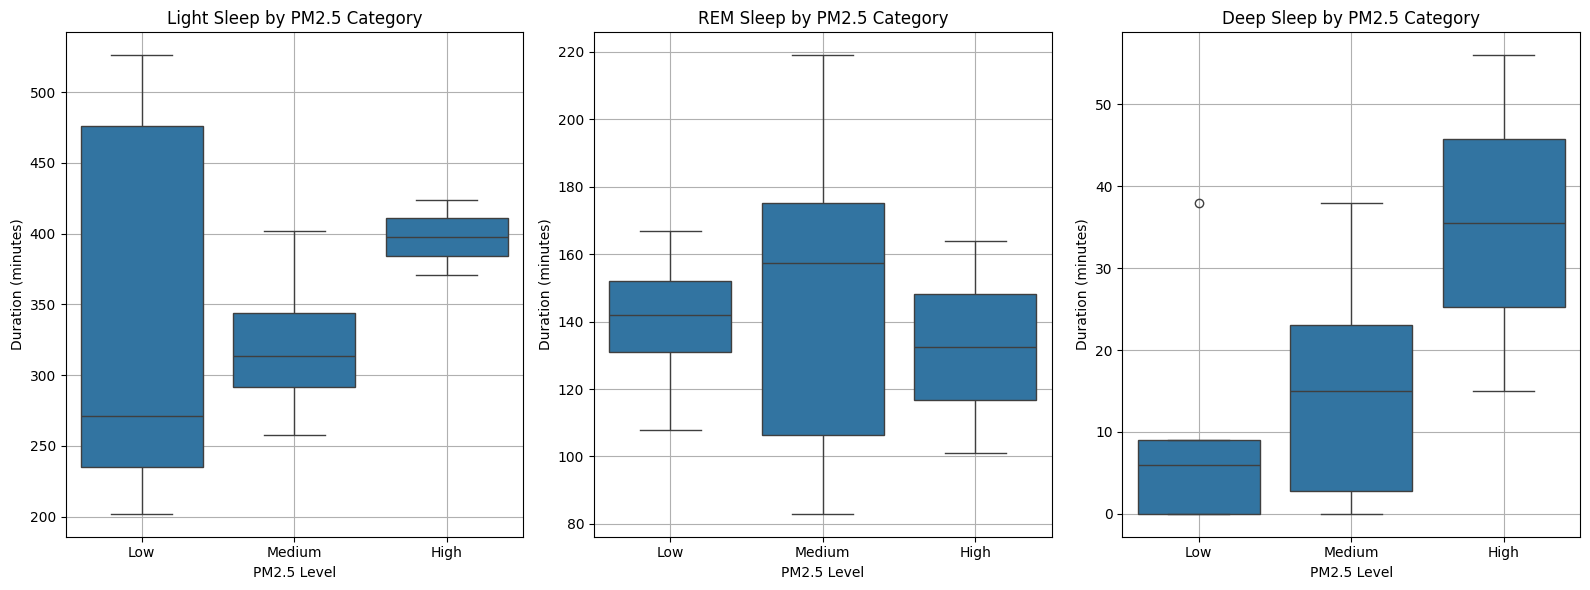


ANOVA for Light Sleep by PM2.5 Category:
  - Medium PM2.5: Mean = 318.9 minutes (5.31 hours)
  - Low PM2.5: Mean = 342.0 minutes (5.70 hours)
  - High PM2.5: Mean = 397.5 minutes (6.62 hours)
  ANOVA Result: F = 0.68, p = 0.5224

ANOVA for REM Sleep by PM2.5 Category:
  - Medium PM2.5: Mean = 149.1 minutes (2.48 hours)
  - Low PM2.5: Mean = 140.0 minutes (2.33 hours)
  - High PM2.5: Mean = 132.5 minutes (2.21 hours)
  ANOVA Result: F = 0.17, p = 0.8484

ANOVA for Deep Sleep by PM2.5 Category:
  - Medium PM2.5: Mean = 16.0 minutes (0.27 hours)
  - Low PM2.5: Mean = 10.6 minutes (0.18 hours)
  - High PM2.5: Mean = 35.5 minutes (0.59 hours)
  ANOVA Result: F = 1.75, p = 0.2093

--- Summary of Analysis ---
This analysis explored the relationships between air quality parameters, environmental factors, and sleep quality metrics.

Top correlations with sleep quality metrics:

Light Sleep:
  - O3: negative correlation (r = -0.43)
  - CO: negative correlation (r = -0.41)

REM Sleep:
  - NO2: p

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from io import StringIO

data = """Date,O3,PM2.5,PM10,NO2,CO,SO2,Temperature,Humidity,Total Sleep Duration,Light Sleep,REM Sleep,Deep Sleep,Awake Time
31.03,47,34,33,11,1,1,16,70,7 h 22 m,5 h 24 m,1h 47 m,11m,29m
1.03,39,40,23,17,6,2,14,75,7h 40m,4h 18m,2h 47m,35m,1m
3.04,14,22,9,23,1,10,7,93,11h 3m,8h 46m,2h 11m,6m,34m
4.04,22,35,15,18,2,20,13,74,7h 48m,5h 3m,2h 28m,17m,10m
7.04,12,37,21,25,1,4,7,93,10h 21m,6h 42m,3h 39m,0m,19m
8.04,18,25,14,22,2,4,4,86,6h 17m,3h 55m,2h 22m,0m,1m
9.04,18,58,30,33,1,5,9,42,8h 4m,4h 48m,2h 53m,23m,0m
10.04,29,36,21,28,1,12,12,46,7h 15m,4h 19m,2h 56m,0m,10m
12.04,29,27,15,27,1,9,8,42,10h 43m,7h 56m,2h 47m,0m,43m
14.04,31,24,14,6,3,20,11,57,5h 19m,3h 22m,1h 48m,9m,1m
15.04,39,21,14,11,1,6,7,88,7h 41m,4h 31m,2h 32m,38m,0m
16.04,31,33,21,32,1,10,9,70,9h 0m,5h 26m,3h 34m,0m,13m
17.04,16,68,30,1,1,11,7,82,8h 48m,6h 11m,1h 41m,56m,50m
18.04,14,109,44,41,2,17,13,76,10h 3m,7h 4m,2h 44m,15m,36m
20.04,26,35,21,7,2,13,8,76,7h 41m,5h 50m,1h 38m,13m,14m
21.04,21,59,27,22,3,22,8,84,7h 2m,5h 1m,1h 23m,38m,4m
23.04,22,53,29,27,1,9,10,87,8h 27m,6h 18m,1h 46m,23m,21m
"""

df = pd.read_csv(StringIO(data))

def time_to_minutes(t):
    """Convert formats like '7h 22m', '1h 5m', '35m' into total minutes."""
    if pd.isnull(t):
        return np.nan

    t = str(t).lower().replace(" ", "")
    h, m = 0, 0

    if "h" in t:
        parts = t.split("h")
        try:
            h = int(parts[0])
        except:
            h = 0
        m_part = parts[1].replace("m", "").replace("s", "")
        try:
            if m_part:
                m = int(m_part)
        except:
            m = 0
    elif "m" in t:
        m_part = t.replace("m", "")
        try:
            m = int(m_part)
        except:
            m = 0

    return h * 60 + m


date_list = []
for date_str in df['Date']:
    try:
        day, month = date_str.split('.')
        day = int(day)
        month = int(month)
        date_list.append(pd.Timestamp(2025, month, day))
    except:
        # Handle any parsing errors
        date_list.append(pd.NaT)

df["Date"] = date_list


sleep_cols = ["Light Sleep", "REM Sleep", "Deep Sleep", "Total Sleep Duration", "Awake Time"]
for col in sleep_cols:
    df[col + " (min)"] = df[col].apply(time_to_minutes)


air_quality_cols = ["O3", "PM2.5", "PM10", "NO2", "CO", "SO2"]
env_cols = ["Temperature", "Humidity"]
sleep_quality_cols = ["Light Sleep (min)", "REM Sleep (min)", "Deep Sleep (min)"]

all_predictors = air_quality_cols + env_cols
all_targets = sleep_quality_cols


print("Data Overview:")
print(f"Number of records: {len(df)}")
print("\nDescriptive Statistics for Air Quality and Sleep Quality:")
print(df[air_quality_cols + sleep_quality_cols].describe())


print("\n--- Correlation Analysis ---")
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap of Air Quality and Sleep Metrics", fontsize=16)
plt.tight_layout()
plt.show()


print("\nCorrelations between Environmental Factors and Sleep Quality:")
corr_subset = correlation_matrix.loc[all_predictors, sleep_quality_cols]
print(corr_subset)


print("\nStrongest correlations for each sleep quality metric:")
for sleep_metric in sleep_quality_cols:
    correlations = correlation_matrix[sleep_metric].loc[all_predictors].sort_values(ascending=False)
    print(f"\n{sleep_metric}:")
    print(correlations)

for sleep_metric in sleep_quality_cols:
    top_correlations = correlation_matrix[sleep_metric].loc[all_predictors].abs().sort_values(ascending=False).head(3)
    top_predictors = top_correlations.index.tolist()

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Top 3 Factors Affecting {sleep_metric.replace(' (min)', '')}", fontsize=16)

    for i, predictor in enumerate(top_predictors):
        sns.regplot(data=df, x=predictor, y=sleep_metric, ax=axes[i])
        axes[i].set_title(f"{predictor} vs {sleep_metric.replace(' (min)', '')}", fontsize=12)
        axes[i].grid(True)


        corr_val = correlation_matrix.loc[predictor, sleep_metric]
        axes[i].annotate(f"r = {corr_val:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
                         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

print("\n--- Multiple Regression Analysis ---")

for sleep_metric in sleep_quality_cols:
    print(f"\nRegression Model for {sleep_metric.replace(' (min)', '')}:")

    X = df[all_predictors]
    X = sm.add_constant(X)  # Add constant term
    y = df[sleep_metric]

    model = sm.OLS(y, X).fit()

    print(f"R-squared: {model.rsquared:.3f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
    print(f"F-statistic: {model.fvalue:.2f}, p-value: {model.f_pvalue:.4f}")

    significant_predictors = model.pvalues[1:][model.pvalues[1:] < 0.1]
    if len(significant_predictors) > 0:
        print("Significant predictors (p < 0.1):")
        for predictor, p_value in significant_predictors.items():
            coef = model.params[predictor]
            print(f"  - {predictor}: coefficient = {coef:.3f}, p-value = {p_value:.4f}")
    else:
        print("No statistically significant predictors found at p < 0.1")


print("\n--- PM2.5 Categorical Analysis ---")

df["PM2.5 Category"] = pd.cut(df["PM2.5"],
                            bins=[0, 30, 60, float('inf')],
                            labels=["Low", "Medium", "High"])

category_counts = df["PM2.5 Category"].value_counts()
print("PM2.5 Category Counts:")
print(category_counts)

plt.figure(figsize=(16, 6))
for i, sleep_metric in enumerate(sleep_quality_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="PM2.5 Category", y=sleep_metric)
    plt.title(f"{sleep_metric.replace(' (min)', '')} by PM2.5 Category", fontsize=12)
    plt.xlabel("PM2.5 Level", fontsize=10)
    plt.ylabel("Duration (minutes)", fontsize=10)
    plt.grid(True)
plt.tight_layout()
plt.show()

for sleep_metric in sleep_quality_cols:
    print(f"\nANOVA for {sleep_metric.replace(' (min)', '')} by PM2.5 Category:")
    categories = df["PM2.5 Category"].dropna().unique()
    sleep_by_category = [df[df["PM2.5 Category"] == cat][sleep_metric].dropna() for cat in categories]

    for i, cat in enumerate(categories):
        mean_min = sleep_by_category[i].mean()
        mean_hr = mean_min / 60
        print(f"  - {cat} PM2.5: Mean = {mean_min:.1f} minutes ({mean_hr:.2f} hours)")

    if all(len(group) > 0 for group in sleep_by_category):
        f_stat, p_val_anova = stats.f_oneway(*sleep_by_category)
        print(f"  ANOVA Result: F = {f_stat:.2f}, p = {p_val_anova:.4f}")
        if p_val_anova < 0.05:
            print("  * Statistically significant difference found (p < 0.05)")
    else:
        print("  Insufficient data for ANOVA test")


print("\n--- Summary of Analysis ---")
print("This analysis explored the relationships between air quality parameters, environmental factors, and sleep quality metrics.")

print("\nTop correlations with sleep quality metrics:")
for sleep_metric in sleep_quality_cols:
    top_corr = correlation_matrix[sleep_metric].loc[all_predictors].abs().sort_values(ascending=False).head(2)
    print(f"\n{sleep_metric.replace(' (min)', '')}:")
    for predictor in top_corr.index:
        corr_val = correlation_matrix.loc[predictor, sleep_metric]
        direction = "positive" if corr_val > 0 else "negative"
        print(f"  - {predictor}: {direction} correlation (r = {corr_val:.2f})")

print("\nKey findings from regression models:")
for sleep_metric in sleep_quality_cols:
    X = df[all_predictors]
    X = sm.add_constant(X)
    y = df[sleep_metric]
    model = sm.OLS(y, X).fit()

    r_squared = model.rsquared
    print(f"\n{sleep_metric.replace(' (min)', '')}:")
    print(f"  - Model explains {r_squared:.1%} of the variance")

    scaled_coefs = model.params[1:] * df[all_predictors].std()
    most_influential = scaled_coefs.abs().sort_values(ascending=False).head(2)

    for predictor in most_influential.index:
        coef = model.params[predictor]
        direction = "increases" if coef > 0 else "decreases"
        print(f"  - A 1-unit increase in {predictor} {direction} {sleep_metric.replace(' (min)', '')} by {abs(coef):.2f} minutes")